# Baseline Models for StockPredictionPro

This notebook implements baseline machine learning models to provide initial benchmarks for stock price prediction.

Models included:
- Linear Regression
- Ridge Regression  
- Lasso Regression
- Decision Tree Regressor
- Random Forest Regressor

These models are simple, fast to train, and useful for initial performance estimation before moving on to advanced algorithms.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_theme(style='darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('✅ Baseline ML libraries loaded')


✅ Baseline ML libraries loaded


In [2]:
try:
    df = pd.read_csv('../data/processed/selected_features.csv', index_col=0)
    print('✅ Selected features loaded')
except FileNotFoundError:
    print('❌ Selected features not found, generating sample data')
    np.random.seed(42)
    n_samples, n_features = 1000, 10
    X_sample = np.random.randn(n_samples, n_features)
    y_sample = X_sample[:, 0] * 0.5 + np.random.normal(0, 0.1, n_samples)
    col_names = [f'feature_{i+1}' for i in range(n_features)]
    df = pd.DataFrame(X_sample, columns=col_names)
    df['target'] = y_sample

print(f'Shape: {df.shape}')
df.head()


❌ Selected features not found, generating sample data
Shape: (1000, 11)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0.180508
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,-0.262259
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0.673086
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,-0.289812
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0.488951


In [3]:
X = df.drop(columns=['target'])
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print(f'Train shape: {X_train_scaled.shape}, Test shape: {X_test_scaled.shape}')


Train shape: (800, 10), Test shape: (200, 10)


In [4]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

preds_train = model_lr.predict(X_train_scaled)
preds_test = model_lr.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

print(f'Linear Regression Train MSE: {mse_train:.4f}')
print(f'Linear Regression Test MSE: {mse_test:.4f}')


Linear Regression Train MSE: 0.0093
Linear Regression Test MSE: 0.0096


In [5]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)

preds_train = model_ridge.predict(X_train_scaled)
preds_test = model_ridge.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

print(f'Ridge Regression Train MSE: {mse_train:.4f}')
print(f'Ridge Regression Test MSE: {mse_test:.4f}')


Ridge Regression Train MSE: 0.0093
Ridge Regression Test MSE: 0.0096


In [6]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_scaled, y_train)

preds_train = model_lasso.predict(X_train_scaled)
preds_test = model_lasso.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

print(f'Lasso Regression Train MSE: {mse_train:.4f}')
print(f'Lasso Regression Test MSE: {mse_test:.4f}')


Lasso Regression Train MSE: 0.0194
Lasso Regression Test MSE: 0.0192


In [7]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_scaled, y_train)

preds_train = model_dt.predict(X_train_scaled)
preds_test = model_dt.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

print(f'Decision Tree Train MSE: {mse_train:.4f}')
print(f'Decision Tree Test MSE: {mse_test:.4f}')


Decision Tree Train MSE: 0.0000
Decision Tree Test MSE: 0.0217


In [8]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

preds_train = model_rf.predict(X_train_scaled)
preds_test = model_rf.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

print(f'Random Forest Train MSE: {mse_train:.4f}')
print(f'Random Forest Test MSE: {mse_test:.4f}')


Random Forest Train MSE: 0.0016
Random Forest Test MSE: 0.0142


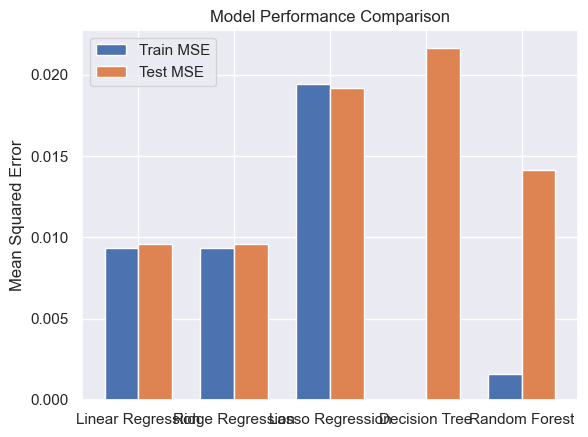

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']
train_mse = [mean_squared_error(y_train, model_lr.predict(X_train_scaled)),
             mean_squared_error(y_train, model_ridge.predict(X_train_scaled)),
             mean_squared_error(y_train, model_lasso.predict(X_train_scaled)),
             mean_squared_error(y_train, model_dt.predict(X_train_scaled)),
             mean_squared_error(y_train, model_rf.predict(X_train_scaled))]

test_mse = [mean_squared_error(y_test, model_lr.predict(X_test_scaled)),
            mean_squared_error(y_test, model_ridge.predict(X_test_scaled)),
            mean_squared_error(y_test, model_lasso.predict(X_test_scaled)),
            mean_squared_error(y_test, model_dt.predict(X_test_scaled)),
            mean_squared_error(y_test, model_rf.predict(X_test_scaled))]

import numpy as np

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_mse, width, label='Train MSE')
plt.bar(x + width/2, test_mse, width, label='Test MSE')
plt.xticks(x, models)
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()
